In [1]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [2]:
import numpy as np
import os 
from matplotlib import pyplot as plt
from tqdm import tqdm
from helper_funcs import *

import pandas as pd

In [3]:
ofdir = '../Assets/abide_1_cmats'
cmat_files = os.listdir(ofdir)
cmat_files.sort()
cmats = np.array([np.load(os.path.join(ofdir,cmat_file)) for cmat_file in tqdm(cmat_files)])

100%|██████████| 1102/1102 [00:01<00:00, 590.10it/s]


In [4]:
cmats.shape

(1102, 51, 51)

In [5]:
df = pd.read_csv('../Data/ABIDE_df2.csv')
csubs = [cmat_file.replace('.npy','') for cmat_file in cmat_files]
is_indf = np.array([val in csubs for val in df['bids_folder'].values])
df = df.iloc[is_indf]
df

,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
0,50002,1,1.0,16.77,1,Ambi,NaN,103.0,116.0,89.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050002,13
1,50003,1,1.0,24.45,1,R,NaN,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050003,13
2,50004,1,1.0,19.09,1,R,NaN,113.0,108.0,117.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050004,13
3,50005,1,1.0,13.73,2,R,NaN,119.0,117.0,118.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050005,13
4,50006,1,1.0,13.37,1,L,NaN,109.0,99.0,119.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050006,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,51583,1,2.0,35.00,1,NaN,100.0,95.0,105.0,84.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051583,14
1044,51584,1,2.0,49.00,1,NaN,100.0,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,23.24,sub-SBL0051584,14
1045,51585,1,1.0,27.00,1,NaN,90.0,96.0,99.0,106.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051585,14
1046,51606,1,2.0,29.00,2,R,NaN,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-MaxMuna0051606,6


In [6]:
has_nans = np.array([np.isnan(cmats[i,:,:]).sum()>0 for i in range(cmats.shape[0])])
cmats = cmats[~has_nans,:,:]

In [7]:
has_nans.sum()

14

In [8]:
np.nonzero(has_nans)[0]

array([ 35,  37,  40,  42,  46,  49, 154, 162, 215, 578, 586, 589, 603,
       610])

In [9]:
np.array(cmat_files)[has_nans]

array(['sub-Caltech0051464.npy', 'sub-Caltech0051466.npy',
       'sub-Caltech0051469.npy', 'sub-Caltech0051471.npy',
       'sub-Caltech0051475.npy', 'sub-Caltech0051478.npy',
       'sub-Leuven20050727.npy', 'sub-Leuven20050736.npy',
       'sub-MaxMunc0051339.npy', 'sub-SDSU0050184.npy',
       'sub-SDSU0050192.npy', 'sub-SDSU0050195.npy',
       'sub-SDSU0050209.npy', 'sub-SDSU0050216.npy'], dtype='<U23')

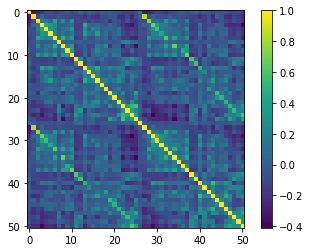

In [10]:
plt.imshow(cmats.mean(axis=0))
plt.colorbar()

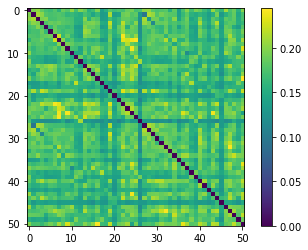

In [11]:
plt.imshow(cmats.std(axis=0))
plt.colorbar()

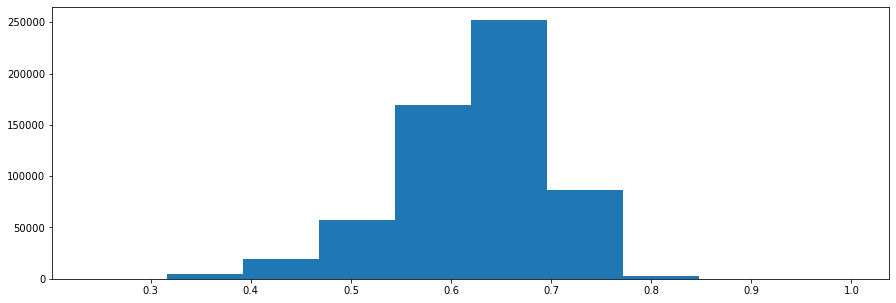

In [12]:
plt.figure(figsize=(15,5))
plt.hist(get_triu(np.corrcoef(cmats.reshape(cmats.shape[0],-1))));

In [13]:
cmats.shape

(1088, 51, 51)

In [14]:
df

,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
0,50002,1,1.0,16.77,1,Ambi,NaN,103.0,116.0,89.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050002,13
1,50003,1,1.0,24.45,1,R,NaN,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050003,13
2,50004,1,1.0,19.09,1,R,NaN,113.0,108.0,117.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050004,13
3,50005,1,1.0,13.73,2,R,NaN,119.0,117.0,118.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050005,13
4,50006,1,1.0,13.37,1,L,NaN,109.0,99.0,119.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050006,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,51583,1,2.0,35.00,1,NaN,100.0,95.0,105.0,84.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051583,14
1044,51584,1,2.0,49.00,1,NaN,100.0,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,23.24,sub-SBL0051584,14
1045,51585,1,1.0,27.00,1,NaN,90.0,96.0,99.0,106.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051585,14
1046,51606,1,2.0,29.00,2,R,NaN,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-MaxMuna0051606,6


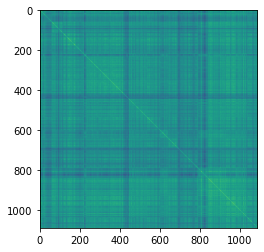

In [15]:
plt.imshow(np.corrcoef(cmats.reshape(cmats.shape[0],-1)))

(array([2.76000e+02, 4.97000e+03, 1.92730e+04, 5.69640e+04, 1.68988e+05,
        2.52222e+05, 8.61390e+04, 2.49300e+03, 1.00000e+00, 2.00000e+00]),
 array([0.23986178, 0.3158756 , 0.39188942, 0.46790324, 0.54391707,
        0.61993089, 0.69594471, 0.77195853, 0.84797236, 0.92398618,
        1.        ]),
 <BarContainer object of 10 artists>)

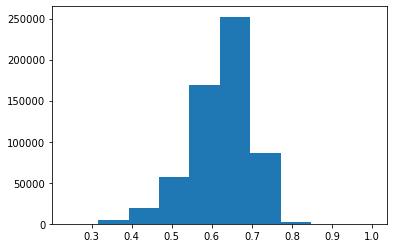

In [16]:
plt.hist(get_triu(np.corrcoef(cmats.reshape(cmats.shape[0],-1))))

In [21]:
patients = df['DX_GROUP'].values==1

In [ ]:
def key_rsa(key,data_scale='ratio', metric='euclidean'):
    initial_slice = patients
    vec = df[key].values[initial_slice]
    sub_slice = ~np.isnan(vec)

    rdm_model = make_RDM(vec[sub_slice],data_scale='ratio', metric='euclidean')
    rdm_bg = np.array([make_RDM(data['BG_ABIDE'][i,initial_slice,:][sub_slice,:]) for i in range(10)])
    rdm_sl = np.array([make_RDM(data['SL_ABIDE'][i,initial_slice,:][sub_slice,:]) for i in range(10)])

    rsa_result = np.zeros((2,10))
    rsa_result[0,:] = fit_rsa(rdm_bg,rdm_model)
    rsa_result[1,:] = fit_rsa(rdm_sl,rdm_model)
    return rsa_result